#### Lorena Karine Sousa dos Santos, ID 100404805

## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [2]:
import numpy as np
import pandas as pd
import os

In [4]:
path = "D:\Downloads\\"

df = pd.read_csv(path+"titanic.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# - Determine if the survival rate is associated to the class of passenger


### To compare if there is an association or not, we can see how many passangers there were per class prior the accident:

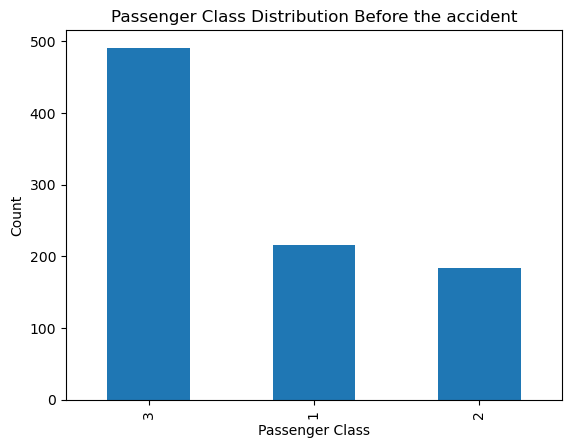

In [34]:
import matplotlib.pyplot as plt

class_distribution = df["Pclass"].value_counts()
class_distribution.plot(kind="bar")
plt.title("Passenger Class Distribution Before the accident")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

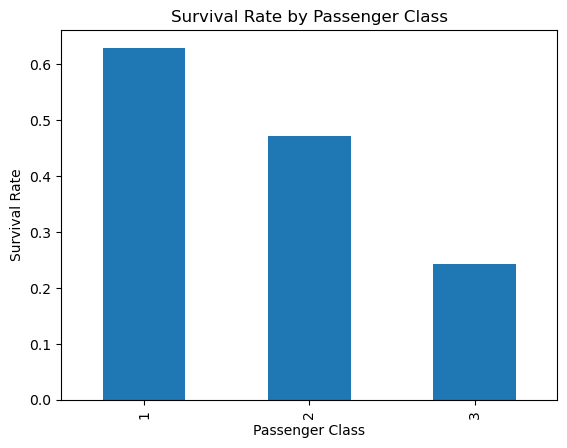

In [35]:
# And then we compare to the amount of survival rate 

class_survival_rate.plot(kind="bar")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

In [32]:
class_survival_rate = df.groupby("Pclass")["Survived"].mean()
print(class_survival_rate)

# 62% of the survivors were class 1, 47% class 2 and only 24% class 3

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


### We can see that, even though class 3 had the majority of the tripulation, class 1 had the most survival rate. There is a correlation between the survival rate and the class of the people

# - Determine if the survival rate is associated to the gender


In [15]:
gender_survived = pd.crosstab(df['Survived'], df['Sex'])

In [16]:
gender_survival_rate = gender_survived.div(gender_survived.sum(axis=1), axis=0) * 100


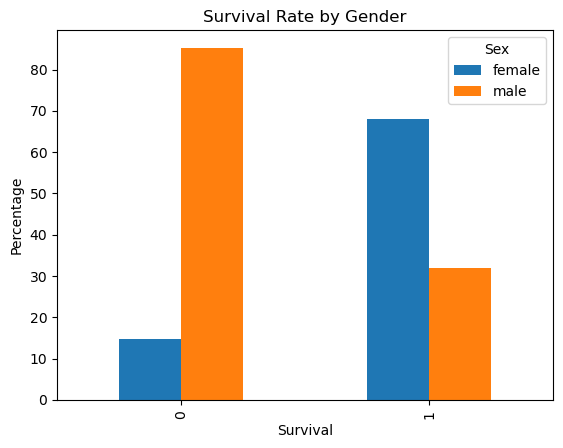

In [17]:
gender_survival_rate.plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.xlabel("Survival")
plt.ylabel("Percentage")
plt.show()

In [20]:
total_passengers = len(df)
gender_counts = df['Sex'].value_counts()
gender_percentages = gender_counts / total_passengers * 100
print(gender_percentages)


male      64.758698
female    35.241302
Name: Sex, dtype: float64


In [21]:
survival_rate = df.groupby('Sex')['Survived'].mean()

print(survival_rate)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


### Despite men being the majority of the members of the Titanic (64% VS 35%), women survived way more (74% VS 18%), showing that there is a correlaiton between gender and survival rate

# - Determine the survival rate is associated to the age


In [22]:
survivors = df[df['Survived'] == 1]
non_survivors = df[df['Survived'] == 0]

<AxesSubplot:>

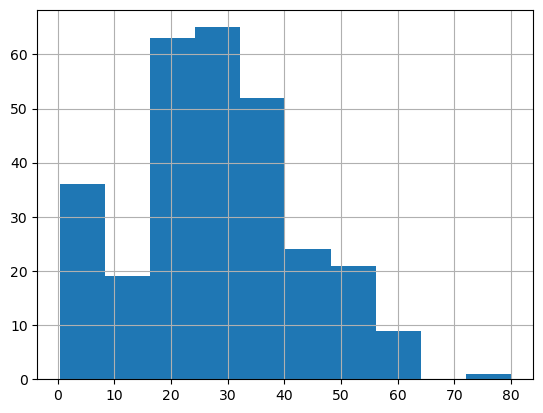

In [24]:
# Histogram of the SURVIVORS
survivors['Age'].hist()

<AxesSubplot:>

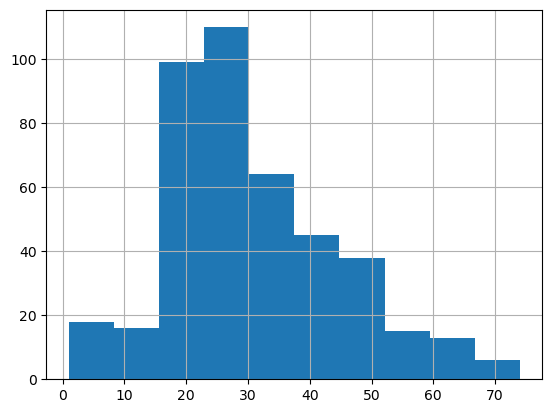

In [26]:
# Histogram of the NON-SURVIVORS

non_survivors['Age'].hist()

In [28]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)


<AxesSubplot:>

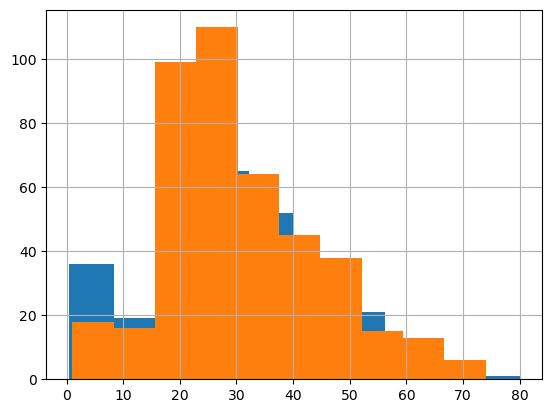

In [29]:
# histogram for both:
survivors['Age'].hist()
non_survivors['Age'].hist()


### Using these methods, age does not seem to be associated to survival rate.